In [1]:

import scipy.sparse
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
train = pd.read_csv('train.csv.zip', parse_dates=['DATE'])
train.head()

,DATE,ATM_ID,CLIENT_OUT
0,2015-01-01,0,91600
1,2015-01-02,0,136500
2,2015-01-03,0,335400
3,2015-01-04,0,379000
4,2015-01-05,0,344100


In [18]:
df = train

In [34]:
df.columns

Index(['DATE', 'ATM_ID', 'CLIENT_OUT'], dtype='object')

In [33]:
import numpy as np 
import pandas as pd

def to_pivot(df):
     return pd.pivot_table(df, values='CLIENT_OUT', index='ATM_ID', columns='DATE')

def from_pivot(df_pivot):
    df = df_pivot.stack().reset_index()
    print(df.columns)
    del df_pivot
    
    df = df[['DATE', 'ATM_ID', 0]]
    df.columns = ['DATE', 'ATM_ID', 'CLIENT_OUT']
    
    return df

# from_pivot(df_pivot)

def HelperForMeans(df_pivot, offset):
    a = np.empty((df_pivot.shape[0], offset))
    a[:] = np.nan
    
    data = np.hstack([a, df_mean.values[:, :-offset]])

#     return data
    return data.reshape(-1)

def CreateColumnsOfMeans(df, offsets=[7, 14, 21, 28, 35], window=61):
    df_pivot = to_pivot(df)
    df_pivot = df_pivot.T.rolling(window=61).mean().T 
    
#     return HelperForMeans(df_pivot, 7)
    return pd.DataFrame(np.array([HelperForMeans(df_pivot, offset) for offset in offsets]).T,
                        columns=['mean_minus_7', 'mean_minus_14', 'mean_minus_21', 'mean_minus_28', 'mean_minus_35'])

    

df_for_means = CreateColumnsOfMeans(df)

In [120]:
df['mean_week_1'] = df_for_means.mean_minus_7

In [26]:
df_mean = df_pivot.T.rolling(window=61).mean().T 

In [57]:
df_mean.head()

DATE,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,...,2017-08-06 00:00:00,2017-08-07 00:00:00,2017-08-08 00:00:00,2017-08-09 00:00:00,2017-08-10 00:00:00,2017-08-11 00:00:00,2017-08-12 00:00:00,2017-08-13 00:00:00,2017-08-14 00:00:00,2017-08-15 00:00:00
ATM_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,437867.213115,439216.393443,436675.409836,433109.836066,432504.918033,439581.967213,438772.131148,432154.098361,430409.836066,429383.606557
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38478.688525,37231.147541,36398.360656,36613.114754,37155.737705,37698.360656,37698.360656,36634.426230,36298.360656,36075.409836
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,240644.262295,239822.950820,236204.918033,229232.786885,233852.459016,239618.032787,239121.311475,235459.016393,234883.606557,225378.688525
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,567895.081967,564814.754098,564204.918033,560806.557377,571736.065574,584129.508197,586049.180328,578709.836066,571478.688525,555016.393443
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,532501.639344,531193.442623,521414.754098,506431.147541,513608.196721,519531.147541,519450.819672,507983.606557,465829.508197,454857.377049


In [70]:
a

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [65]:
np.nan((20, 10))

TypeError: 'float' object is not callable

In [71]:
df_means_minus28 = np.hstack([a, df_mean.values[:, :-28]])

In [74]:
df_means_minus28 = pd.DataFrame(df_means_minus28)

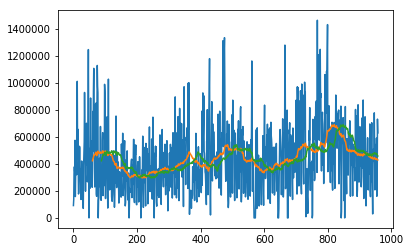

In [77]:
n = 365
means = np.hstack([np.zeros(n), df_mean.loc[0, :].values[:-n]])
n = 0
# plt.plot(np.hstack([df_pivot.loc[0, :].values[n:], np.zeros(n)]))

plt.plot(df_pivot.loc[0, :].values)
plt.plot(df_mean.loc[0, :].values)
plt.plot(df_means_minus28.loc[0, :].values)


In [23]:
df_pivot.rolling(window=61).mean()

DATE,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,...,2017-08-06 00:00:00,2017-08-07 00:00:00,2017-08-08 00:00:00,2017-08-09 00:00:00,2017-08-10 00:00:00,2017-08-11 00:00:00,2017-08-12 00:00:00,2017-08-13 00:00:00,2017-08-14 00:00:00,2017-08-15 00:00:00
ATM_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def CreateUniqueIdsForCalculatingMeans(df):
    big_list = [[0] * 43] + [[i] * 61 for i in range(1, 16)]
    big_list = [item for sublist in big_list for item in sublist]
    ids = np.unique(df.ATM_ID)
    big_list = big_list *  len(ids)
    
    df["NEW_UNIQUE_IDS"] = (df.ATM_ID.values + 1000 * np.array(big_list))

In [13]:
CreateUniqueIdsForCalculatingMeans(df)
df

,DATE,ATM_ID,CLIENT_OUT,NEW_UNIQUE_IDS
0,2015-01-01,0,91600,0
1,2015-01-02,0,136500,0
2,2015-01-03,0,335400,0
3,2015-01-04,0,379000,0
4,2015-01-05,0,344100,0
5,2015-01-06,0,575300,0
6,2015-01-07,0,158200,0
7,2015-01-08,0,296500,0
8,2015-01-09,0,453400,0
9,2015-01-10,0,415900,0


In [4]:
from datetime import datetime, timedelta
train.DATE.max() - timedelta(days=61)

Timestamp('2017-06-15 00:00:00')

In [ ]:
condition = (train.DATE.dt.year )
df = train[(train.DATE > ]

In [14]:
atm_ids = 'NEW_UNIQUE_IDS'

In [15]:
means = df.groupby(atm_ids, as_index=False)['CLIENT_OUT'].mean()
means.rename(columns={'CLIENT_OUT': 'mean'}, inplace=True)
means

,NEW_UNIQUE_IDS,mean
0,0,407027.906977
1,2,37127.906977
2,3,421137.209302
3,4,465953.488372
4,5,191755.813953
5,6,476337.209302
6,7,131844.186047
7,8,402388.372093
8,9,136272.093023
9,10,262339.534884


In [ ]:
means_last_15_days = df.groupby('ATM_ID', as_index=False)['CLIENT_OUT'].mean()

In [132]:
df

,DATE,ATM_ID,CLIENT_OUT,mean_week_1,weekend_dummy
0,2015-01-01,0,91600,NaN,0
1,2015-01-02,0,136500,NaN,0
2,2015-01-03,0,335400,NaN,1
3,2015-01-04,0,379000,NaN,1
4,2015-01-05,0,344100,NaN,0
5,2015-01-06,0,575300,NaN,0
6,2015-01-07,0,158200,NaN,0
7,2015-01-08,0,296500,NaN,0
8,2015-01-09,0,453400,NaN,0
9,2015-01-10,0,415900,NaN,1


In [131]:

df['weekend_dummy'] = df.DATE.dt.dayofweek.isin([5,6]) + 0

In [135]:
def split(data):
    return [data[-7:], data[-14:-7], data[-21:-14], data[-28:-21], data[-34:-29]]


def shift(df, i):
    for n in [1,2,3,4,5]:
        N = n + i 
        df['out_{}_weeks_ago'.format(N)] = df.CLIENT_OUT.shift(7*N)
        df['out_{}_weeks_ago_plus_day'.format(N)] = df.CLIENT_OUT.shift(7*N-1)
        df['out_{}_weeks_ago_minus_day'.format(N)] = df.CLIENT_OUT.shift(7*N+1)
    return df



In [136]:
df_splitted = split(df)
for i, d in enumerate(df_splitted):
    df_splitted[i] = shift(d, i)

/home/progiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/progiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/progiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [137]:
df_splitted


[             DATE  ATM_ID  CLIENT_OUT   mean_week_1  weekend_dummy  \
 287393 2017-08-09     419       18500  33027.868852              0   
 287394 2017-08-10     419       87300  33686.885246              0   
 287395 2017-08-11     419       47500  34231.147541              0   
 287396 2017-08-12     419       18100  33967.213115              1   
 287397 2017-08-13     419        5000  33373.770492              1   
 287398 2017-08-14     419       32300  33408.196721              0   
 287399 2017-08-15     419       78100  33786.885246              0   
 
         out_1_weeks_ago  out_1_weeks_ago_plus_day  out_1_weeks_ago_minus_day  \
 287393              NaN                       NaN                        NaN   
 287394              NaN                       NaN                        NaN   
 287395              NaN                       NaN                        NaN   
 287396              NaN                       NaN                        NaN   
 287397              NaN 

In [138]:
import functions.GenerateFis

In [ ]:
n = 365
means = np.hstack([np.zeros(n), df_mean.loc[0, :].values[:-n]])

In [151]:
df.iloc[-1]['CLIENT_OUT'] = 'NaN'

/home/progiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


None


In [150]:
df

,DATE,ATM_ID,CLIENT_OUT,mean_week_1,weekend_dummy
0,2015-01-01,0,91600,NaN,0
1,2015-01-02,0,136500,NaN,0
2,2015-01-03,0,335400,NaN,1
3,2015-01-04,0,379000,NaN,1
4,2015-01-05,0,344100,NaN,0
5,2015-01-06,0,575300,NaN,0
6,2015-01-07,0,158200,NaN,0
7,2015-01-08,0,296500,NaN,0
8,2015-01-09,0,453400,NaN,0
9,2015-01-10,0,415900,NaN,1


In [152]:
df.dropna(subset=df.columns.drop('CLIENT_OUT'))

,DATE,ATM_ID,CLIENT_OUT,mean_week_1,weekend_dummy
0,2015-01-01,0,91600,NaN,0
1,2015-01-02,0,136500,NaN,0
2,2015-01-03,0,335400,NaN,1
3,2015-01-04,0,379000,NaN,1
4,2015-01-05,0,344100,NaN,0
5,2015-01-06,0,575300,NaN,0
6,2015-01-07,0,158200,NaN,0
7,2015-01-08,0,296500,NaN,0
8,2015-01-09,0,453400,NaN,0
9,2015-01-10,0,415900,NaN,1
